# PCA for chemical descriptors

# Goal of the project

Here, we get familiarized with chemical descriptors and there importance in drug design and also using the Principle Component analysis with the different components for the dimensionality reduction from the dataset of EGFR-tested compounds from the ChEMBL database to understand the working of the PCA as well as the alternative techniques.

# Learning goals


## Theory


* Chemical descriptors
* Canonical SMILES 
* Molecular fingerprints
* Priciple component analysis
   * Pros and cons
   * Applications

## Practical


* Import the required packages and use dataset CHEMBL25_activities_EGFR.csv.
* Transform the pIC50 values into binary values 
* Transform the SMILES into a fingerprint composed of RDKit's physchem descriptors.
* Perform PCA with 2 components and plot both active and non-active points 
* PCA with 3 components
* PCA with varying the parameters in the fingerprints


# References

* Molecular informatics 2016 35 160-180. DOI: [10.1002/minf.201501019](https://onlinelibrary.wiley.com/doi/full/10.1002/minf.201501019)
* [RDKit descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors)
* [Implementing a Principal Component Analysis (PCA)](https://sebastianraschka.com/Articles/2014_pca_step_by_step.html), Sebastian Raschka
* [PCA in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA)
* [RdKit fingerprints](http://www.rdkit.org/UGM/2012/Landrum_RDKit_UGM.Fingerprints.Final.pptx.pdf)

# Theory

## Chemical descriptors

Chemical descriptor is "The molecular descriptor is the final result of a logic and mathematical procedure which transforms chemical information encoded within a symbolic representation of a molecule into a useful number or the result of some standardized experiment".
Molecular descriptors are considered to be the properties of the molecule expressed in numerical value usually calculated by drug design and statistical software.
They can be broadly categorized into the following categories:
- Constitutional (the relative numbers of various atom types)
- Topological (describing properties and connectivity of atoms making up the material)
- Physicochemical (relating to the water or lipid solubility, dipole moment, formal charge, etc.)
- Structural (describing the three-dimensional size, shape, and surface properties of the molecule
- Quantum-chemical (e.g., partial charges, polarizabilities, multipole moments, orbital energies, etc. calculated   using semiempirical, density functional theory)

<div style="text-align: center;">
    <img src="images/Cd.png" style="max-width: 190px; width:200%;" />
</div>

*Figure 1:* Chemical descriptors.

The importance of calculating these descriptors lies in relating them to activity to construct a quantitative linear structure activity relationship which is used to validate the obtained IC50 of the tested molecules and further to predict the activity of new proposed hits.


## Canonical SMILES

The simplified molecular-input line-entry system (SMILES) is a specification in the form of a line notation for describing the structure of chemical species using short ASCII strings.
The SMILES format is a linear text format which can describe the connectivity and chirality of a molecule. Canonical SMILES gives a single 'canonical' form for any particular molecule.
However, the term SMILES is also commonly used to refer to both a single SMILES string and a number of SMILES strings; the exact meaning is usually apparent from the context. The terms "canonical" and "isomeric" can lead to some confusion when applied to SMILES.

<div style="text-align: center;">
    <img src="images/SMILES.png" style="max-width: 300px; width:200%;" />
</div>

*Figure 1:* SMILE structure generation.



## Molecular fingerprints

A molecular "fingerprint" is a widely used concept in chemical informatics. Comparing molecules is hard. Comparing bitstrings is easy. Many people turn a molecule into a bitstring under the assumption that comparing the bitstring gives insight to how to compare molecules. To make life more complicated, chemical informatics uses the term "fingerprint" but feel free to think of it in your head as "bitstring."

There are two main major types of fingerprints, and lots of lesser used ones. "Structural fingerprints" are based on substructure features. The most widely known and used are the MACCS keys, which are available in two flavors: 166 bit and 320 bit. Each bit in a structural fingerprint corresponds to some chemical property, usually some sort of substructure presence. 

<div style="text-align: center;">
    <img src="images/fp.png" style="max-width: 300px; width:200%;" />
</div>

*Figure 2:* Representation of a molecular substructure fingerprint.



## Principle component analysis

The main purpose of a principal component analysis is the analysis of data to identify patterns and finding patterns to reduce the dimensions of the dataset with minimal loss of information.
PCA is used to transform a high-dimensional dataset into a smaller-dimensional subspace – into a new coordinate system. In the new coordinate system, the first axis corresponds to the first principal component, which is the component that explains the greatest amount of the variance in the data.

In simple words, a principal component analysis is a method of extracting important variables known as principal components from a large set of variables available in a data set. It captures as much information as possible from the original high dimensional data. It represents the original data in terms of its principal components in a new dimension space.

#### What are the Principal Components?

Principal components are the underlying structure in the data. They are the directions where there is the most variance, the directions where the data is most spread out. There are multiple principal components of a data – each representing the different variance of the data. They are arranged in a chronological order of variance. The first PC will capture the most variance i.e. the most information about the data, followed by the second, third and so on.

There are 6 general steps for performing a principal component analysis. They are

1. Take the whole dataset consisting of d-dimensional samples ignoring the class labels
2. Compute the d-dimensional mean vector (i.e., the means for every dimension of the whole dataset)
3. Compute the scatter matrix (alternatively, the covariance matrix) of the whole data set
4. Compute eigenvectors (ee1,ee2,...,eed) and corresponding eigenvalues (λλ1,λλ2,...,λλd)
5. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form    d×k dimensional matrix WW(where every column represents an eigenvector)
6. Use this d×k eigenvector matrix to transform the samples onto the new subspace.

PCA can also be performed using scikit learn libraries, which is basically the simple and a easy method. 

### Pros and Cons

#### Pros
- Removes Correlated Features
- Improves Algorithm Performance
- Reduces Overfitting
- Improves Visualization

#### Cons
- Independent variables become less interpretable
- Data standardization is must before PCA
- Information Loss

### Applications of PCA

- Compression
- Visualization
- Speeding up Machine Learning Algorithms
- Reducing Noise from the data

# Practical

## Import the required packages and use dataset CHEMBL25_activities_EGFR.csv

Importing the necessary python libraries

* Numpy - package for scientifc computing
* Pandas - package for working with data frames (tables)
* RDKit - chemoinformatics library
* sklearn - designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy
* Matplotlib - To plot the statistical values

In [1]:
# Import statements
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print('All packages are installed successfully')

All packages are installed successfully


### Load data

Load the data provided and The csv file is loaded into a dataframe with the important columns:

* CHEMBL-ID
* IC50 values
* Units
* Canonical SMILES
* pIC50 values

In [2]:
# Load data using absolute path
df = pd.read_csv('../../data/CHEMBL25_activities_EGFR.csv', index_col=0)

In [3]:
# remove warnings
pd.options.mode.chained_assignment = None

In [4]:
# Check the dimension of the data
print(df.shape)

(3906, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3906 entries, 1777 to 2783
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chembl_id         3906 non-null   object 
 1   IC50              3906 non-null   float64
 2   units             3906 non-null   object 
 3   canonical_smiles  3906 non-null   object 
 4   pIC50             3906 non-null   float64
dtypes: float64(2), object(3)
memory usage: 183.1+ KB


In [6]:
df.head(6)

,chembl_id,IC50,units,canonical_smiles,pIC50
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000
2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940
1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531
6596,CHEMBL4069003,3.0,nM,Brc1cc(Nc2ncnc3c2cc(OCCCOP(=O)(N(CCCl)CCCl)N)c...,8.522879


In [7]:
df.tail(6)

,chembl_id,IC50,units,canonical_smiles,pIC50
5673,CHEMBL3806213,24.100000,nM,Clc1c(F)ccc(Nc2ncnc3c2c2OCCOc2c(OCC2OCCC2)c3)c1,7.617983
1560,CHEMBL309937,77500.000000,nM,N(c1ncnc2[nH]c(C)c(C)c12)c1ccc(CC)cc1,4.110698
3780,CHEMBL1829271,24680.000000,nM,Brc1cc(CC(=O)NS(=O)(=O)c2ccccc2)ccc1,4.607655
6207,CHEMBL3671533,9.000000,nM,Brc1cc(F)c(Nc2ncnc3c2cc(NC(=O)C=C)c(OCCNC(=O)C...,8.045757
3011,CHEMBL589826,32.599998,nM,Clc1c(F)ccc(Nc2ncnc3c2cc(OCCCCC=C)c(OC)c3)c1,7.486783
2783,CHEMBL473437,4.000000,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(-c2[nH]c(...,8.397940


### Draw the molecules

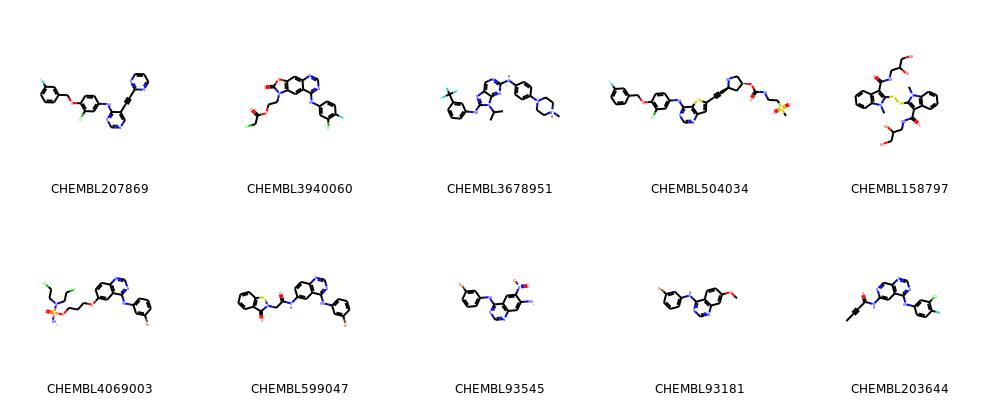

In [8]:
# Using pandas tools and Draw method we can visualize our molecules
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='canonical_smiles')
Draw.MolsToGridImage(list(df.ROMol[0:10]),
                     legends=list(df.chembl_id[0:20]), molsPerRow=5)

## Transform the pIC50 values into binary values.

###  Classify data

Classification of the compound as active or inactive, by transforming them to binary therefore, using the pIC50 values.

* pIC50 = -log10(IC50)
* IC50 describes the molar concentration (mol/L) that will result in 50 percent of inhibition in-vitro.
* A common cut-off value to discretize pIC50 data is 6,3, which is used for this experiment.

Using the functions defined above to generate the molecules and their fingerprints as well as specifying which molecule is active and which is not.


In [9]:
# Drop unnecessary columns
df_new = df.drop(['units', 'IC50'], axis=1)

In [10]:
# Mark every molecule as active with an pIC50 of > 6.3
df_new.loc[df_new[df_new.pIC50 >= 6.3].index, 'state'] = 1.0
print('actives: %d, inactives: %d' % (df_new.state.sum(),
                                      len(df_new)-df_new.state.sum()))

actives: 2214, inactives: 1692


In [11]:
df_new["state"] = df_new["state"].fillna(0)

,chembl_id,canonical_smiles,pIC50,ROMol,state
1777,CHEMBL207869,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,1.0
5785,CHEMBL3940060,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,1.0
6373,CHEMBL3678951,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,,1.0
2442,CHEMBL504034,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940,,1.0
1084,CHEMBL158797,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531,,0.0

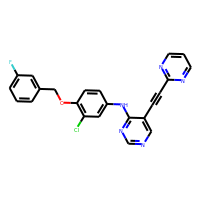
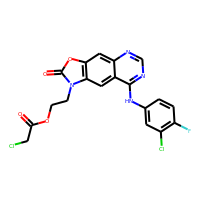
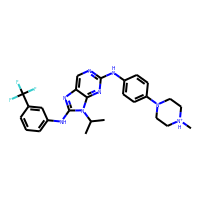
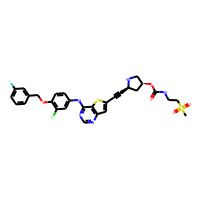
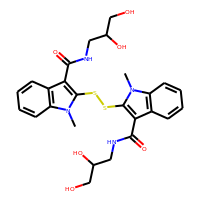

In [12]:
df_new.head(5)

## Transform the SMILES into a fingerprint composed of RDKit's physchem descriptors.

Fingerprints are generated from the Canonical SMILES by using the RDkit

In [13]:
mol = Chem.MolFromSmiles('Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1')

In [14]:
mol_weights = [Descriptors.MolWt(mol)]
mol_weights

[431.8580000000001]

In [15]:
# make a list of SMILES
df_smiles = df_new['canonical_smiles']
c_smiles = []
for ds in df_smiles:
    try:
        cs = Chem.CanonSmiles(ds)
        c_smiles.append(cs)
    except Exception:
        print('Invalid SMILES:', ds)
print()

In [16]:
# make a list of mols
mols = [Chem.MolFromSmiles(x) for x in c_smiles]

In [17]:
# Calculate values for the all the phys chem descriptors
mol_weights = [Descriptors.MolWt(mol) for mol in mols]
Exact_mol_weights = [Descriptors.ExactMolWt(mol) for mol in mols]
HeavyAtomMolWt = [Descriptors.HeavyAtomMolWt(mol) for mol in mols]
FpDensityMorgan1 = [Descriptors.FpDensityMorgan1(mol) for mol in mols]
FpDensityMorgan2 = [Descriptors.FpDensityMorgan2(mol) for mol in mols]
FpDensityMorgan3 = [Descriptors.FpDensityMorgan3(mol) for mol in mols]
MaxAbsPartialCharge = [Descriptors.MaxAbsPartialCharge(mol, force=False)
                       for mol in mols]
MaxPartialCharge = [Descriptors.MaxPartialCharge(mol, force=False)
                    for mol in mols]
MinAbsPartialCharge = [Descriptors.MinAbsPartialCharge(mol, force=False)
                       for mol in mols]
MinPartialCharge = [Descriptors.MinPartialCharge(mol, force=False)
                    for mol in mols]
NumRadicalElectrons = [Descriptors.NumRadicalElectrons(mol) for mol in mols]
NumValenceElectrons = [Descriptors.NumRadicalElectrons(mol) for mol in mols]

In [18]:
# Generate DataFrame for the results
mw_df = pd.DataFrame({'mw': mol_weights,
                      'Exact_mw': Exact_mol_weights,
                      'Heavyatom_mw': HeavyAtomMolWt, 'Fp_densityM1':
                      FpDensityMorgan1, 'Fp_densityM2':
                      FpDensityMorgan2, 'Fp_densityM3': FpDensityMorgan3,
                      'MaxAbs_ParCharge':
                      MaxAbsPartialCharge, 'Max_ParCharge': MaxPartialCharge,
                      'MinAbs_ParCharge': MinAbsPartialCharge, 'Min_ParCharge':
                      MinPartialCharge, 'NumRadEle': NumRadicalElectrons,
                      'NumValEle': NumValenceElectrons})

# Sort by molecular weight
mw_df.sort_values(['mw'], ascending=False, inplace=True)
mw_df[["mw", "Exact_mw", "Heavyatom_mw", "Fp_densityM1",
       "Fp_densityM2", "Fp_densityM3",
       "MaxAbs_ParCharge", "Max_ParCharge", "MinAbs_ParCharge",
       "Min_ParCharge", "NumRadEle", "NumValEle"]]

,mw,Exact_mw,Heavyatom_mw,Fp_densityM1,Fp_densityM2,Fp_densityM3,MaxAbs_ParCharge,Max_ParCharge,MinAbs_ParCharge,Min_ParCharge,NumRadEle,NumValEle
2705,1422.720,1421.748941,1318.896,0.670000,1.270000,1.860000,0.550170,0.245853,0.245853,-0.550170,0,0
1466,1407.327,1400.775361,1368.015,0.440000,0.813333,1.240000,0.871276,0.141086,0.141086,-0.871276,0,0
3172,1160.495,1159.786309,1056.671,0.530864,0.962963,1.382716,0.390717,0.245423,0.245423,-0.390717,0,0
3132,1093.994,1087.655981,1071.818,0.500000,0.826923,1.250000,0.869189,0.155246,0.155246,-0.869189,0,0
1659,1032.251,1031.483314,966.731,0.506494,0.961039,1.441558,0.486117,0.337743,0.337743,-0.486117,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3826,144.137,144.043596,140.105,1.545455,2.272727,2.727273,0.345071,0.132848,0.132848,-0.345071,0,0
1758,130.150,130.053098,124.102,1.100000,2.000000,2.900000,0.244153,0.115541,0.115541,-0.244153,0,0
1468,126.111,126.031694,120.063,0.888889,1.333333,1.666667,0.504161,0.199750,0.199750,-0.504161,0,0
3429,110.112,110.036779,104.064,0.875000,1.250000,1.500000,0.504260,0.156883,0.156883,-0.504260,0,0


In [19]:
# make a list of fingerprints (fp)
fps = [FingerprintMols.FingerprintMol(mol) for mol in mols]

In [20]:
fps

 ...]

In [21]:
# Generate fingerprints for all molecules
fp_list = []
for i in range(len(mols)):
    fp_list.append(FingerprintMols.FingerprintMol(mols[i]))

In [22]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, maxPath=5, bitInfo=rdkbi)
rdkbi[1553]

[[1, 30, 29, 14, 13],
 [4, 31, 10, 9, 5],
 [4, 31, 5, 6, 8],
 [11, 12, 13, 29, 14]]

## Perform PCA with 2 components and plot both active and non-active points 

Initailly check the data with the NaN, infinity values and preprocessed them to obtain the required input values,
Took the generated vector array and used it for PCA, Here the standard scalar funtion is used to scale down the values by using standard deviation=1 and mean=0, Additionally transform object is done and fit the data.
The formed array has the values converted based on mean and standard deviation.Finally the PCA is formed with 2 components and plotted both active and inactive points of the compounds and check to the covariance score.

In [23]:
col_mask = mw_df.isnull().any(axis=0)

In [24]:
row_mask = mw_df.isnull().any(axis=1)

In [25]:
mw_df.loc[row_mask, col_mask]

,MaxAbs_ParCharge,Max_ParCharge,MinAbs_ParCharge,Min_ParCharge
40,NaN,NaN,NaN,NaN
785,NaN,NaN,NaN,NaN
349,NaN,NaN,NaN,NaN
2603,NaN,NaN,NaN,NaN
2836,NaN,NaN,NaN,NaN
1237,NaN,NaN,NaN,NaN


In [26]:
mw_df[mw_df == np.inf] = np.nan
mw_df.fillna(mw_df.mean(), inplace=True)

In [27]:
Array = np.array(mw_df)
Array

array([[ 1.42272000e+03,  1.42174894e+03,  1.31889600e+03, ...,
        -5.50170228e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.40732700e+03,  1.40077536e+03,  1.36801500e+03, ...,
        -8.71276226e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.16049500e+03,  1.15978631e+03,  1.05667100e+03, ...,
        -3.90716900e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.26111000e+02,  1.26031694e+02,  1.20063000e+02, ...,
        -5.04161340e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.10112000e+02,  1.10036779e+02,  1.04064000e+02, ...,
        -5.04260125e-01,  0.00000000e+00,  0.00000000e+00],
       [ 3.54530000e+01,  3.49694013e+01,  3.54530000e+01, ...,
        -1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

### Standardization

When performing PCA, it is typically a good idea to standardize the data first. Because PCA seeks to identify the principal components with the highest variance, if the data is not properly standardized, attributes with large values and large variances (in absolute terms) will end up dominating the first principal component when they should not. Standardizing the data gets each attribute onto more or less the same scale so that each attribute has an opportunity to contribute to the principal component analysis.

In [28]:
pca = PCA(n_components=2)
pca.fit(Array)
x_pca = pca.transform(Array)

In [29]:
pca.explained_variance_ratio_

array([9.99461843e-01, 5.30792097e-04])

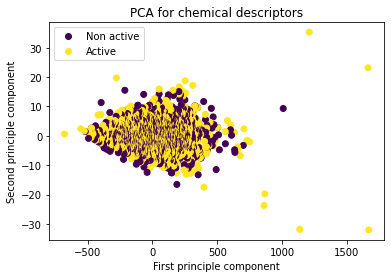

In [30]:
plt.figure(figsize=(6, 4))
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title("PCA for chemical descriptors")

classes = ['Non active', 'Active']

scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df_new['state'])
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [31]:
scaler = StandardScaler()
scaler.fit(mw_df)

StandardScaler()

In [32]:
scaled_data = scaler.transform(mw_df)

In [33]:
scaled_data

array([[ 8.90027996,  8.91242085,  8.63647156, ..., -0.82700634,
         0.        ,  0.        ],
       [ 8.76157272,  8.72311463,  9.1050739 , ..., -3.69119364,
         0.        ,  0.        ],
       [ 6.53735487,  6.54796264,  6.13480726, ...,  0.59527851,
         0.        ,  0.        ],
       ...,
       [-2.78354098, -2.78264139, -2.80056806, ..., -0.41661826,
         0.        ,  0.        ],
       [-2.92770893, -2.92701048, -2.95320083, ..., -0.4174994 ,
         0.        ,  0.        ],
       [-3.60046562, -3.60456391, -3.60775966, ..., -4.83937835,
         0.        ,  0.        ]])

In [34]:
pca = PCA(n_components=12)

In [35]:
pca.fit(scaled_data)

PCA(n_components=12)

In [36]:
x_pca = pca.transform(scaled_data)

In [37]:
scaled_data.shape

(3906, 12)

In [38]:
pca.explained_variance_ratio_

array([3.74822614e-01, 2.61766023e-01, 1.99932438e-01, 1.33756237e-01,
       2.03656637e-02, 8.29037968e-03, 4.90724127e-04, 4.15369915e-04,
       1.60096108e-04, 4.55476658e-07, 0.00000000e+00, 0.00000000e+00])

In [39]:
pca = PCA(n_components=2)

In [40]:
pca.fit(scaled_data)

PCA(n_components=2)

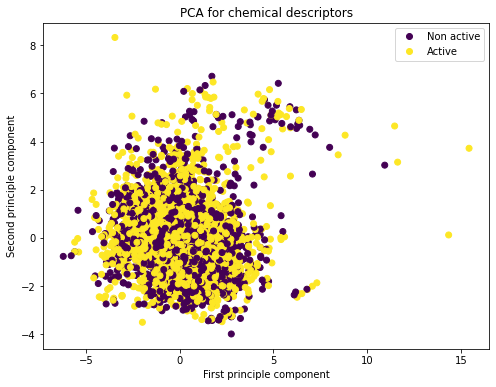

In [41]:
plt.figure(figsize=(8, 6))
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title("PCA for chemical descriptors")

classes = ['Non active', 'Active']

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df_new['state'])
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [42]:
pca.components_

array([[ 0.4667227 ,  0.46694339,  0.46662613, -0.23737428, -0.23885343,
        -0.22166298,  0.08602903,  0.29044683,  0.29289027, -0.07947827,
         0.        ,  0.        ],
       [-0.14732336, -0.14709716, -0.14931804, -0.49629059, -0.53762168,
        -0.5090857 ,  0.01188086, -0.26785521, -0.26034426, -0.01363827,
         0.        ,  0.        ]])

## PCA with 3 components

Here the same procedure but with 3 components are considered.

In [43]:
pca = PCA(n_components=3)

In [44]:
pca.fit(scaled_data)

PCA(n_components=3)

In [45]:
x1_pca = pca.transform(scaled_data)

In [46]:
scaled_data.shape

(3906, 12)

In [47]:
x1_pca.shape

(3906, 3)

In [48]:
scaled_data

array([[ 8.90027996,  8.91242085,  8.63647156, ..., -0.82700634,
         0.        ,  0.        ],
       [ 8.76157272,  8.72311463,  9.1050739 , ..., -3.69119364,
         0.        ,  0.        ],
       [ 6.53735487,  6.54796264,  6.13480726, ...,  0.59527851,
         0.        ,  0.        ],
       ...,
       [-2.78354098, -2.78264139, -2.80056806, ..., -0.41661826,
         0.        ,  0.        ],
       [-2.92770893, -2.92701048, -2.95320083, ..., -0.4174994 ,
         0.        ,  0.        ],
       [-3.60046562, -3.60456391, -3.60775966, ..., -4.83937835,
         0.        ,  0.        ]])

In [49]:
x1_pca

array([[14.34973563,  0.11998577, -1.04089879],
       [15.4383972 ,  3.72174715,  2.80005277],
       [11.62770849,  3.1455206 , -2.53153814],
       ...,
       [-2.54527375,  5.05606084,  1.14536534],
       [-2.82164483,  5.9269538 ,  1.17564576],
       [-3.45544979,  8.32564079,  7.99031155]])

In [50]:
pca.explained_variance_ratio_

array([0.37482261, 0.26176602, 0.19993244])

In [51]:
pca.singular_values_

array([120.99822853, 101.11666945,  88.37058913])

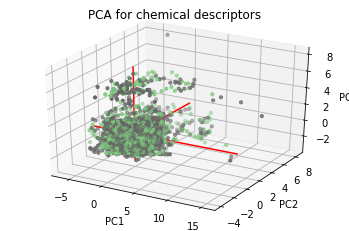

In [52]:
my_color = df_new['state']


# Run The PCA
pca = PCA(n_components=3)
pca.fit(scaled_data)

# Store results of PCA in a data frame
result = pd.DataFrame(pca.transform(scaled_data),
                      columns=['PCA%i' % i for i in range(3)],
                      index=df.index)


# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'],
           result['PCA2'], c=my_color, cmap="Accent", s=10)


# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0, 0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0, 0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0, 0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA for chemical descriptors")
plt.show()

## PCA with varying the parameters in the fingerprints 

In [53]:
mols = [Chem.MolFromSmiles(x) for x in c_smiles]

In [54]:
# Varying the parameters by considering 29 phys chem descriptors
CalcKappa1 = [rdMolDescriptors.CalcKappa1(mol) for mol in mols]
CalcFractionCSP3 = [rdMolDescriptors.CalcFractionCSP3(mol) for mol in mols]
CalcKappa2 = [rdMolDescriptors.CalcKappa2(mol) for mol in mols]
CalcKappa3 = [rdMolDescriptors.CalcKappa3(mol) for mol in mols]
CalcNumAliphaticCarbocycles = [rdMolDescriptors.CalcNumAliphaticCarbocycles(mol)
                               for mol in mols]
CalcNumAliphaticHeterocycles = [rdMolDescriptors.CalcNumAliphaticHeterocycles(mol)
                                for mol in mols]
CalcNumAliphaticRings = [rdMolDescriptors.CalcNumAliphaticRings(mol) for mol in mols]
CalcNumAmideBonds = [rdMolDescriptors.CalcNumAmideBonds(mol) for mol in mols]
CalcNumAromaticHeterocycles = [rdMolDescriptors.CalcNumAromaticHeterocycles(mol)
                               for mol in mols]
CalcNumAromaticCarbocycles = [rdMolDescriptors.CalcNumAromaticCarbocycles(mol)
                              for mol in mols]
CalcNumAromaticRings = [rdMolDescriptors.CalcNumAromaticRings(mol) for mol in mols]
CalcNumAtomStereoCenters = [rdMolDescriptors.CalcNumAtomStereoCenters(mol)
                            for mol in mols]
CalcNumBridgeheadAtoms = [rdMolDescriptors.CalcNumBridgeheadAtoms(mol) for mol in mols]
CalcNumHBA = [rdMolDescriptors.CalcNumHBA(mol) for mol in mols]
CalcNumHBD = [rdMolDescriptors.CalcNumHBD(mol) for mol in mols]
CalcNumHeteroatoms = [rdMolDescriptors.CalcNumHeteroatoms(mol) for mol in mols]
CalcNumHeterocycles = [rdMolDescriptors.CalcNumHeterocycles(mol) for mol in mols]
CalcNumLipinskiHBA = [rdMolDescriptors.CalcNumLipinskiHBA(mol) for mol in mols]
CalcNumLipinskiHBD = [rdMolDescriptors.CalcNumLipinskiHBD(mol) for mol in mols]
CalcNumRotatableBonds = [rdMolDescriptors.CalcNumRotatableBonds(mol) for mol in mols]
CalcNumSaturatedCarbocycles = [rdMolDescriptors.CalcNumSaturatedCarbocycles(mol)
                               for mol in mols]
CalcNumRings = [rdMolDescriptors.CalcNumRings(mol) for mol in mols]
CalcNumSaturatedHeterocycles = [rdMolDescriptors.CalcNumSaturatedHeterocycles(mol)
                                for mol in mols]
CalcNumSaturatedRings = [rdMolDescriptors.CalcNumSaturatedRings(mol) for mol in mols]
CalcNumSpiroAtoms = [rdMolDescriptors.CalcNumSpiroAtoms(mol) for mol in mols]
CalcNumUnspecifiedAtomStereoCenters = [rdMolDescriptors.
                                       CalcNumUnspecifiedAtomStereoCenters
                                       (mol) for mol in mols]
MolLogP = [Descriptors.MolLogP(mol) for mol in mols]
Ipc = [Descriptors.Ipc(mol) for mol in mols]
MolMR = [Descriptors.MolMR(mol) for mol in mols]

In [55]:
# Generate DataFrame for the results
new_df = pd.DataFrame({'MolLogP': MolLogP, 'Mol_MR': MolMR, 'Frac_CSP3':
                       CalcFractionCSP3, 'Kappa1': CalcKappa1,
                       'Kappa2': CalcKappa2, 'Kappa3': CalcKappa3,
                       'Num_AliHeterocyc': CalcNumAliphaticHeterocycles,
                       'Num_AliCarbocyc': CalcNumAliphaticCarbocycles,
                       'Num_AliRings': CalcNumAliphaticRings,
                       'Num_Amidebonds': CalcNumAmideBonds, 'Num_AroHeterocyc':
                       CalcNumAromaticHeterocycles, 'Num_AroCarbocyc':
                       CalcNumAromaticCarbocycles, 'Num_AroRings':
                       CalcNumAromaticRings, 'Num_Atomsteriocenters':
                       CalcNumAtomStereoCenters, 'Ipc': Ipc,
                       'Num_Bridgehead_atoms': CalcNumBridgeheadAtoms,
                       'Num_HBA': CalcNumHBA, 'Num_HBD':
                       CalcNumHBD, 'Num_Heteroatoms': CalcNumHeteroatoms,
                       'Num_Heterocyc': CalcNumHeterocycles,
                       'Num_Lipinski_HBA': CalcNumLipinskiHBA,
                       'Num_Lipinski_HBD': CalcNumLipinskiHBD,
                       'Num_Rings': CalcNumRings, 'Num_Rot_bonds':
                       CalcNumRotatableBonds, 'Num_Sat_Carbocyc':
                       CalcNumSaturatedCarbocycles, 'Num_Sat_Heterocyc':
                       CalcNumSaturatedHeterocycles, 'Num_Sat_Rings':
                       CalcNumSaturatedRings, 'Num_Spiroatoms': CalcNumSpiroAtoms,
                       'Num_UnspeAtomSC': CalcNumUnspecifiedAtomStereoCenters})

# Sort by molecular weight
new_df.sort_values(['Mol_MR'], ascending=False, inplace=True)
new_df[["MolLogP", "Mol_MR", "Frac_CSP3", "Kappa1",
        "Kappa2", "Kappa3",
        "Num_AliHeterocyc", "Num_AliCarbocyc", "Num_AliRings",
        "Num_Amidebonds", "Num_AroHeterocyc", "Num_AroCarbocyc",
        "Num_AroRings", "Num_Atomsteriocenters", "Ipc",
        "Num_Bridgehead_atoms", "Num_HBA", "Num_HBD",
        "Num_Heteroatoms", "Num_Heterocyc", "Num_Lipinski_HBA",
        "Num_Lipinski_HBD", "Num_Rings", "Num_Rot_bonds", "Num_Sat_Carbocyc",
        "Num_Sat_Heterocyc", "Num_Sat_Rings", "Num_Spiroatoms",
        "Num_UnspeAtomSC"]]

,MolLogP,Mol_MR,Frac_CSP3,Kappa1,Kappa2,Kappa3,Num_AliHeterocyc,Num_AliCarbocyc,Num_AliRings,Num_Amidebonds,...,Num_Heterocyc,Num_Lipinski_HBA,Num_Lipinski_HBD,Num_Rings,Num_Rot_bonds,Num_Sat_Carbocyc,Num_Sat_Heterocyc,Num_Sat_Rings,Num_Spiroatoms,Num_UnspeAtomSC
2705,-5.78060,361.4480,0.636364,83.370320,42.144461,27.578991,2,0,2,12,...,3,33,20,4,31,0,1,1,0,0
1659,13.02890,300.9991,0.312500,53.330450,21.620779,11.976381,0,2,2,2,...,1,13,3,9,16,0,0,0,0,0
3172,-9.41550,294.3718,0.788462,72.903353,38.567841,27.016680,1,0,1,11,...,1,29,28,1,28,0,1,1,0,1
1466,8.99670,292.5015,0.176471,58.087429,27.041776,15.695472,0,0,0,0,...,0,18,6,6,24,0,0,0,0,0
2698,9.12970,227.9357,0.208333,39.897457,18.297799,9.458975,0,0,0,0,...,1,11,1,7,16,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1.62980,39.5380,0.000000,5.353053,2.062292,0.739491,0,0,0,0,...,1,2,0,2,0,0,0,0,0,0
3826,0.84026,37.7907,0.000000,7.041982,3.187861,1.667960,0,0,0,0,...,1,4,1,1,1,0,0,0,0,0
1468,0.80340,31.4364,0.000000,5.751234,1.853880,0.887203,0,0,0,0,...,0,3,3,1,0,0,0,0,0,0
3429,1.09780,29.7716,0.000000,4.966628,1.738121,0.729375,0,0,0,0,...,0,2,2,1,0,0,0,0,0,0


In [56]:
Arr = np.array(new_df)
Arr

array([[-5.78060000e+00,  3.61448000e+02,  6.36363636e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.30289000e+01,  3.00999100e+02,  3.12500000e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.41550000e+00,  2.94371800e+02,  7.88461538e-01, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 8.03400000e-01,  3.14364000e+01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.09780000e+00,  2.97716000e+01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.99600000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [57]:
pca1 = PCA(n_components=2)
pca1.fit(Arr)
x_pca1 = pca1.transform(Arr)

In [58]:
pca1.explained_variance_ratio_

array([1.00000000e+00, 5.44090008e-43])

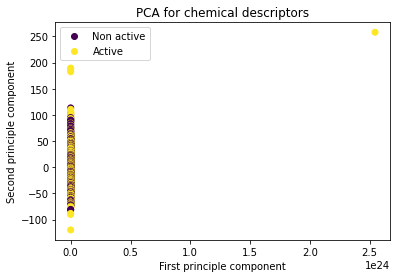

In [59]:
plt.figure(figsize=(6, 4))
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title("PCA for chemical descriptors")

classes = ['Non active', 'Active']

scatter = plt.scatter(x_pca1[:, 0], x_pca1[:, 1], c=df_new['state'])
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [60]:
scaler1 = StandardScaler()
scaler1.fit(new_df)

StandardScaler()

In [61]:
scaled_data1 = scaler1.transform(new_df)

In [62]:
scaled_data1

array([[-6.05262973,  8.29798966,  3.51315588, ...,  1.0004852 ,
        -0.06045951, -0.30306989],
       [ 5.69865125,  6.2425775 ,  0.92090394, ..., -0.57846235,
        -0.06045951, -0.30306989],
       [-8.32354237,  6.0172329 ,  4.73056974, ...,  1.0004852 ,
        -0.06045951,  2.20496187],
       ...,
       [-1.93925968, -2.92322123, -1.58039179, ..., -0.57846235,
        -0.06045951, -0.30306989],
       [-1.75533256, -2.97982855, -1.58039179, ..., -0.57846235,
        -0.06045951, -0.30306989],
       [-4.31294409, -3.99213661, -1.58039179, ..., -0.57846235,
        -0.06045951, -0.30306989]])

In [63]:
pca1.explained_variance_ratio_

array([1.00000000e+00, 5.44090008e-43])

In [64]:
pca1 = PCA(n_components=29)

In [65]:
pca1.fit(scaled_data1)

PCA(n_components=29)

In [66]:
x_pca1 = pca1.transform(scaled_data1)

In [67]:
scaled_data1.shape

(3906, 29)

In [68]:
pca1.explained_variance_ratio_

array([3.23372644e-01, 1.38065619e-01, 1.03996932e-01, 8.42282039e-02,
       6.81578673e-02, 5.23711802e-02, 4.30897690e-02, 3.37855937e-02,
       2.98312414e-02, 2.71252480e-02, 2.00081378e-02, 1.98397728e-02,
       1.19174820e-02, 1.11274195e-02, 1.01608770e-02, 7.27059475e-03,
       4.04737231e-03, 3.67486991e-03, 2.75129815e-03, 2.13886067e-03,
       1.40807899e-03, 1.12226047e-03, 3.04011235e-04, 2.04666383e-04,
       6.52910685e-33, 4.87763780e-33, 3.06718789e-33, 1.50120526e-33,
       1.09058670e-33])

In [69]:
pca1 = PCA(n_components=2)

In [70]:
pca1.fit(scaled_data1)

PCA(n_components=2)

In [71]:
pca1.explained_variance_ratio_

array([0.32337264, 0.13806562])

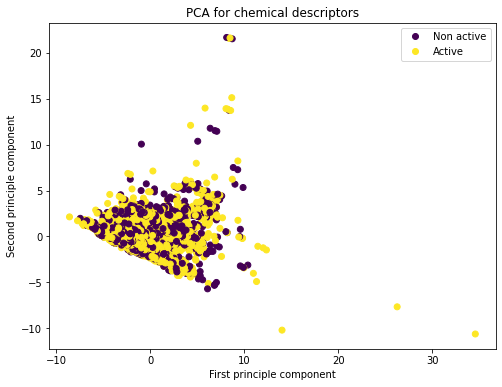

In [72]:
plt.figure(figsize=(8, 6))
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title("PCA for chemical descriptors")

classes = ['Non active', 'Active']

plt.scatter(x_pca1[:, 0], x_pca1[:, 1], c=df_new['state'])
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [73]:
pca1.components_

array([[ 0.0530245 ,  0.30180854,  0.19225343,  0.30188455,  0.28501842,
         0.24906134,  0.18659317,  0.03315588,  0.18117152,  0.17034496,
         0.07879171,  0.10818286,  0.14483858,  0.11979608,  0.05902273,
         0.06835957,  0.22624666,  0.15770792,  0.27126217,  0.18395134,
         0.27435543,  0.1342827 ,  0.23148127,  0.23211217,  0.04463447,
         0.21290519,  0.20283416,  0.03992806,  0.03581854],
       [-0.13854657, -0.10076606,  0.1889607 , -0.1272261 , -0.16287544,
        -0.19285416,  0.27613039,  0.28203323,  0.37962297, -0.0462737 ,
        -0.03946266, -0.18194596, -0.16578512,  0.1354104 , -0.04238189,
         0.22625434, -0.07824506, -0.1258236 , -0.12439232,  0.14759544,
        -0.08074026, -0.09959796,  0.10219798, -0.22460822,  0.28527138,
         0.22523399,  0.33301674,  0.18604802,  0.07317274]])

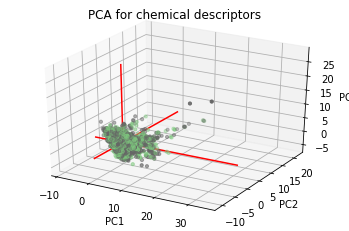

In [74]:
my_color = df_new['state']


# Run The PCA
pca1 = PCA(n_components=3)
pca1.fit(scaled_data1)

# Store results of PCA in a data frame
result = pd.DataFrame(pca1.transform(scaled_data1),
                      columns=['PCA%i' % i for i in range(3)],
                      index=df.index)


# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'],
           result['PCA2'], c=my_color, cmap="Accent", s=10)


# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0, 0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0, 0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0, 0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA for chemical descriptors")
plt.show()